# Principal Component Analysis (PCA)
PCA is an algorithm that uses linear algebra to reduce the dimension of data. It is less intuitive than most algorithms and requires some linear algebra to understand. 
## Process 
consider $\text{X}_0 \in \mathbb{R}^{n\times p}$ to be the original data, we select $k$ as the number of components we want.

0. Data Preprocessing:

    We first center the data:

$\text{X} =\begin{pmatrix}
x_{11}-\bar x_1 & x_{12}-\bar x_2 & \cdots & x_{1p}-\bar x_p\\[4pt]
x_{21}-\bar x_1 & x_{22}-\bar x_2 & \cdots & x_{2p}-\bar x_p\\[4pt]
\vdots           & \vdots           & \ddots & \vdots\\[4pt]
x_{n1}-\bar x_1 & x_{n2}-\bar x_2 & \cdots & x_{np}-\bar x_p
\end{pmatrix}
\quad\text{with}\quad
\bar x_j=\frac{1}{n}\sum_{i=1}^{n}x_{ij}.$

1. Covariance Matrix

   Covariance is defined as $\text{cov}(\text{X},\text{Y}) = \frac{\sum^n_{i=1}({x}_i-\bar {x})({y}_i-\bar {y})}{n-1}$. It is a statistical value that describes how two variables change together. The covariance matrix, $\text{S}$, generalizes this idea to many variables at once. After $\text{X}$ is centered, $S=\frac{1}{n-1}\text{X}^\text{T} \text{X} \in \mathbb{R}^{p\times p}$.

    This matrix has these properties:

    a. Symmetry: $\text{S}=\text{S}^\text{T}$.

    b. Positive-semidefinite: all eigenvalues $\lambda_i \geq 0$.

    c. Its eigenvectors give the principal axes.

2. Eigen-decomposition of $\text{S}$

    The next step is to find the eigen vectors of $\text{S}$, which is essentially solving this equation:

   $$\text{S}v = \lambda v $$

    This is equivalent to solving $\text{det}(\text{S}-\lambda \text{I}) = 0$.

3. Projection to $k$ principal axes

    We construct the projection matrix $\text{W}$ by selecting the most important principal components. This importance is measured by variance ratios, which $\text{Variance Ratio}_i = \frac{\lambda_i}{\sum_{j=1}^p \lambda_j}$ . This step is essentially selecting the first $k$ eigen vectors with the greatest eigenvalues.

   $$ \text{W} = \begin{bmatrix} v_1 & v_2 & \cdots & v_k \end{bmatrix} \in  \mathbb{R}^{p\times k} $$

    Lastly, multiply $\text{X}$ by $\text{W}$

   $$ \text{X}_k =  \text{X} \text{W} \in \mathbb{R}^{n\times k} $$

    The transformed coordinates of the original data is also called the PCA score.

   
## Disadvantages

    Although PCA is very fast (linear to the number of samples), it relies on linear projection, meaning that it only works with linearly separable data. Kernel PCA utilizes a kernel function to project data into a higher-dimensional feature space, where the data becomes linearly separable, and then applies PCA

    There are other algorithms that perform dimension reduction, for example: t-Distributed Stochastic Neighbor Embedding (t-SNE), Uniform Manifold Approximation and Projection (UMAP), and Isometric Mapping (Isomap). We might cover these in the future.



  brand     id   mois   prot    fat   ash  sodium  carb   cal
0     A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1     A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2     A  14025  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3     A  14016  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4     A  14005  30.49  21.28  41.65  4.82    1.64  1.76  4.67
   brand     id   mois   prot    fat   ash  sodium  carb   cal
0      0  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1      0  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2      0  14025  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3      0  14016  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4      0  14005  30.49  21.28  41.65  4.82    1.64  1.76  4.67
Explained variance ratio: [0.53677444 0.25593412]
First 5 rows of PCA scores (Z):
 [[ 5.33089611 -2.49025423]
 [ 5.33773835 -2.33961753]
 [ 5.1422724  -2.49711391]
 [ 4.82100674 -2.12982355]
 [ 4.82048065 -2.00473842]]


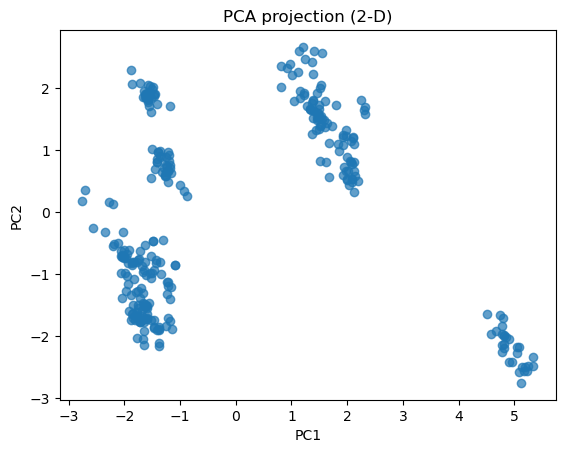

In [13]:
# Implementation on a pizza dataset, reducing 9 dimensions to 2.

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# load data
data_path = 'pizza.csv' # your data.csv
df = pd.read_csv(data_path)


# There are non-numerical values so we need to do encoding:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
print(df.head()) #original data
df['brand'] = encoder.fit_transform(df['brand'])
print(df.head()) #encoded version
X = df.values
# centering data 
scaler = StandardScaler()   # normalize data
X_centered = scaler.fit_transform(X)

# 4. Fit PCA and transform to k
k = 2 #transforming to 2 dimensions
pca = PCA(n_components=k)        # keep 2 principal components
Z = pca.fit_transform(X_centered) 

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("First 5 rows of PCA scores (Z):\n", Z[:5])

# 6. Quick plot (optional)  ------------------------
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA projection (2-D)')
plt.show()